Found 16011 files belonging to 10 classes.
1/1 [==============================] - 0s 325ms/step
🔹 Precision: 0.6386
🔹 Recall: 0.6294
🔹 F1 Score: 0.6227


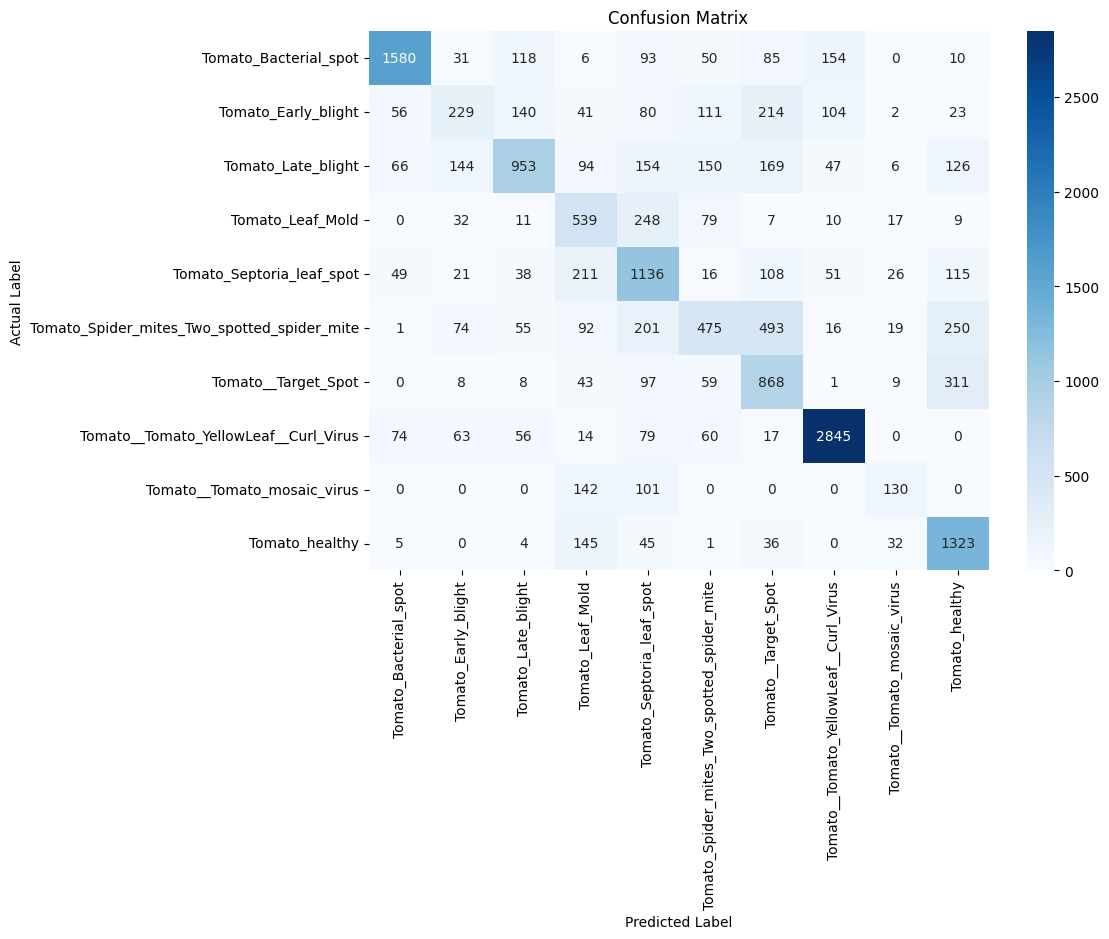

501/501 [==============================] - 10s 19ms/step


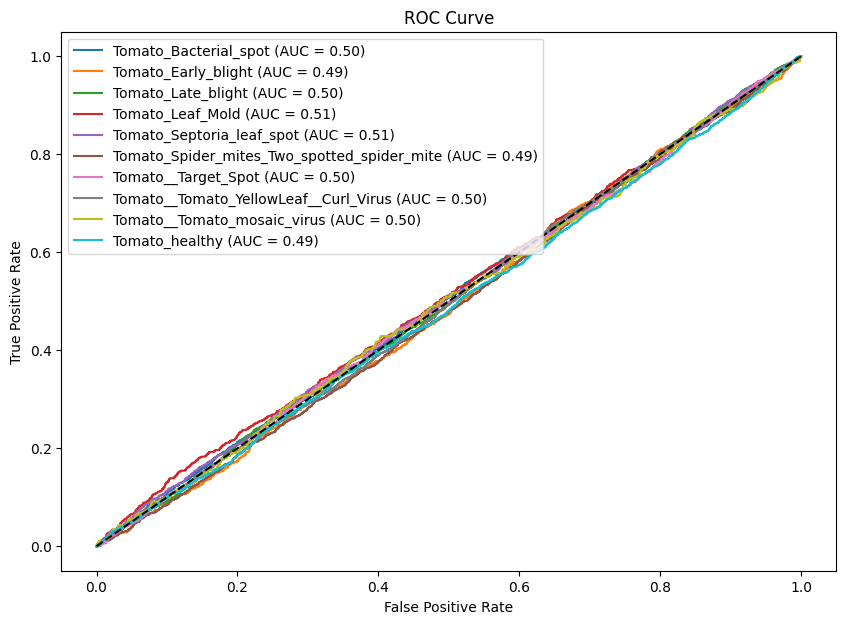

🔹 Classification Report:

                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.86      0.74      0.80      2127
                        Tomato_Early_blight       0.38      0.23      0.29      1000
                         Tomato_Late_blight       0.69      0.50      0.58      1909
                           Tomato_Leaf_Mold       0.41      0.57      0.47       952
                  Tomato_Septoria_leaf_spot       0.51      0.64      0.57      1771
Tomato_Spider_mites_Two_spotted_spider_mite       0.47      0.28      0.35      1676
                        Tomato__Target_Spot       0.43      0.62      0.51      1404
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.88      0.89      0.88      3208
                Tomato__Tomato_mosaic_virus       0.54      0.35      0.42       373
                             Tomato_healthy       0.61      0.83      0.70      1591

                                   ac

In [1]:
import tensorflow as tf 

# Define constants
IMAGE_SIZE = 256
BATCH_SIZE = 32

# Load the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",  # Change this path if needed
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Get class names
class_names = test_ds.class_names

# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_score, f1_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the trained model
model_version = 5  # Change if using a different saved version
model_path = f"../models/{model_version}"
model = load_model(model_path)

# Load test dataset
# Ensure 'test_ds' is available in the same format as used during training
y_true = []
y_pred = []

for images, labels in test_ds:  
    predictions = model.predict(images)
    y_true.extend(labels.numpy())  # Actual labels
    y_pred.extend(np.argmax(predictions, axis=1))  # Predicted labels

# Convert lists to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Get class names 
class_names = ['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']  

# ------------------------
# 1️⃣ Precision and F1 Score
# ------------------------
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

# ------------------------
# 2️⃣ Confusion Matrix
# ------------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# ------------------------
# 3️⃣ ROC Curve & AUC
# ------------------------
# Convert labels to one-hot encoding for multi-class ROC curve
y_true_one_hot = tf.keras.utils.to_categorical(y_true, num_classes=len(class_names))
y_pred_prob = model.predict(test_ds)  # Get probability outputs

plt.figure(figsize=(10, 7))

for i in range(len(class_names)):  
    fpr, tpr, _ = roc_curve(y_true_one_hot[:, i], y_pred_prob[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random model)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# ------------------------
# 4️⃣ Classification Report
# ------------------------
print("🔹 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))
